In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# use 100% of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:"
             +str(100)
             +"% !important; }</style>"))

In [2]:
data = pd.read_csv('BlackFriday.csv')
data = data.assign(units = 1)

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


1. Customers mainly male. Are these males buying menswear or males buying womenswear? Can decide to stock more menswear
2. Customers are mainly 26-35.. marketing efforts products 

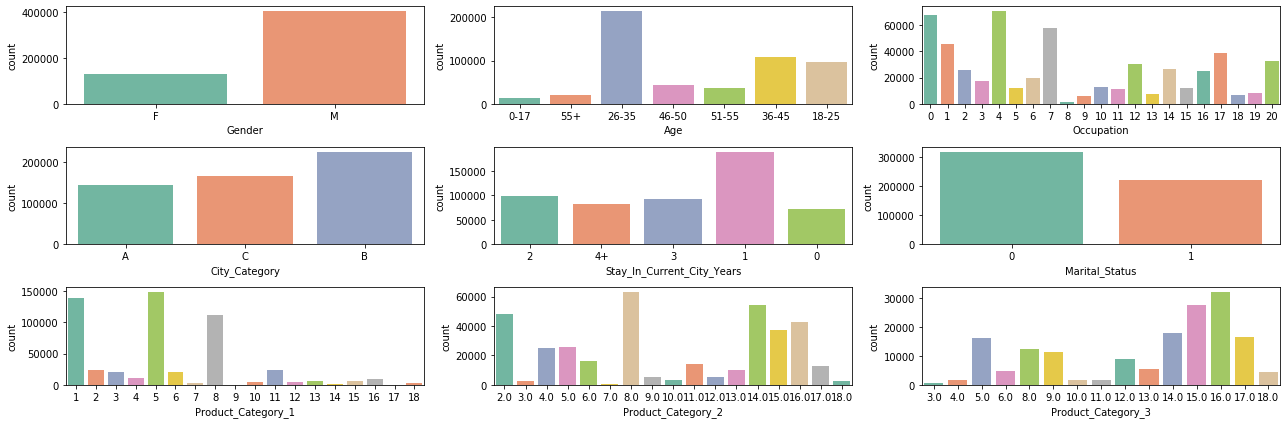

In [68]:
# a function which can plot the value counts of multiple variables within a dataset at once
def variable_count_plots(data, variable_list, subplots = (3,3),figsize=(20,10), hue=None):
    """ creates multiple bar plots to visualise the number of units bought for the values within a list of categorical variables"""
    #axes is a list of rows ()
    #explode the args object and passes in values within tuple seperately.
    fig, axes = plt.subplots(*subplots)
    fig.set_size_inches(*figsize)
    
    #axes.ravel returns the flattened underlying data as an ndarray.
    #plot one variable on each axes
    for variable, axis in zip(variable_list, axes.ravel()):
        sns.countplot(x= variable, data = data,hue = hue, ax=axis, palette = "Set2")
    
    plt.tight_layout()


variables = list(data.drop(['Purchase','User_ID','Product_ID'],axis=1).columns)

variable_count_plots(data,variables,figsize=(18,6))

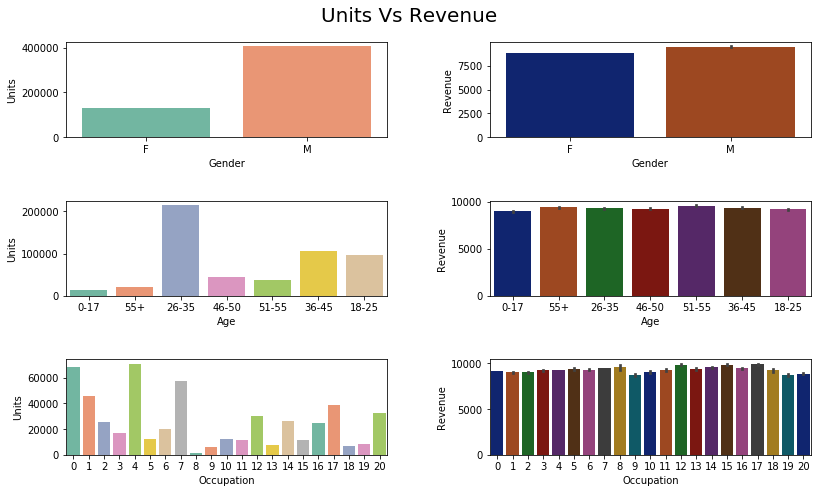

In [79]:
def units_vs_revenue(data, variable_list, subplots = (3,2),figsize=(12,7), hue=None):
    
    n = len(variable_list)
    plt.figure(figsize=figsize)
    plt.suptitle("Units Vs Revenue",fontsize=20, y=1.01)
    
    #for increment,variable in zip(range(n),variable_list):
    increment = 0
    for variable in variable_list:
        #let number of rows be number of variables in variable_list
        #left column will be units
        plt.subplot(n,2,1+increment)
        a = sns.countplot(x= variable, data = data,hue = hue, palette = "Set2")
        a.set(xlabel= f'{variable}', ylabel='Units')
        increment += 1
        
        # right column will be revenue
        plt.subplot(n,2,1+increment)
        b = sns.barplot(x= variable,y='Purchase', data = data, palette = "dark")
        b.set(xlabel= f'{variable}', ylabel='Revenue')
        increment += 1
            
    #pad between suptitle and plots
    #w_pad, h_pad : (height/width) between edges of adjacent subplots.
    plt.tight_layout(pad = 3, w_pad=5, h_pad=3)
units_vs_revenue(data,variable_list=['Gender','Age','Occupation'])        

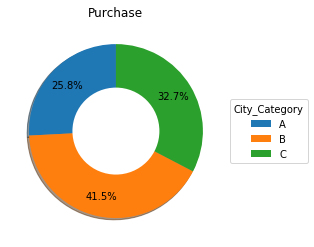

In [80]:
def pie_plotter1(data, column, sum_up='Purchase', axes=plt, title=False, multiple=False):
    """make 1 pie chart to see the total purchase amount for each value in a categorical variable"""
    #select rows in data where column has a given value
    df = (data
          #.loc[data[column]==value]
          .groupby([column])
          [sum_up]
          .sum()
          .reset_index()
         )

    
    labels = df[column].get_values()
    values = df[sum_up].get_values()
    
    #put pie chart on current axis or axes specified in function input
    #pctdistance = The ratio between the center of each pie slice and the start of the text generated by autopct
    
    
    #if we only have 1 axis we can use gca(Get Current Axis) to put the white centre circle on the axis we are using 
    if multiple == False:  
        axes.pie(values,shadow=True,autopct='%1.1f%%',pctdistance=0.77,startangle=90)
        #create a white circle with a radius of 0.5
        centre_circle = axes.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
        #get the current figure
        fig = axes.gcf()
        #add the white circle to the current axis (gca) on the current figure (gcf)
        fig.gca().add_artist(centre_circle)
        fig.gca().set_title(sum_up)
        plt.legend(labels=labels,title= column,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
        
    else:
        axes.pie(values,labels=labels,shadow=True,autopct='%1.1f%%',pctdistance=0.77,startangle=90)
        
    if title:
        plt.title(column1 + str(' - ') + column2)
        
        
pie_plotter1(data,'City_Category')

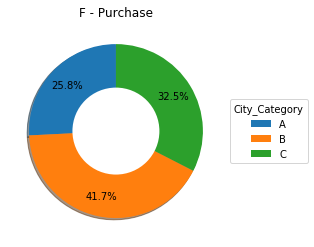

In [81]:
def pie_plotter2(data, column_value, column2, sum_up='Purchase', axes=plt, title=False, multiple=False):
    """ """
    #select rows in data where column has a given value
    df = (data
          .loc[data[column_value[0]]==column_value[1]]
          .groupby([column_value[0],column2])
          [sum_up]
          .sum()
          .reset_index()
         )

    
    labels = df[column2].get_values()
    values = df[sum_up].get_values()

    
    #pctdistance = The ratio between the center of each pie slice and the start of the text generated by autopct
    axes.pie(values,shadow=True,autopct='%1.1f%%',pctdistance=0.77,startangle=90)
    plt.legend(labels=labels,title= column2,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    
    if title:
        plt.title(column_value[1] + ' - ' + sum_up)
    
    #if we only have 1 axis we can use gca(Get Current Axis) to put the white centre circle on the axis we are using 
    if not multiple:
        #create a white circle with a radius of 0.5
        centre_circle = axes.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
        #get the current figure
        fig = axes.gcf()
        #add the white circle to the current axis on the current figure
        fig.gca().add_artist(centre_circle)

pie_plotter2(data,['Gender','F'],'City_Category',title=True)

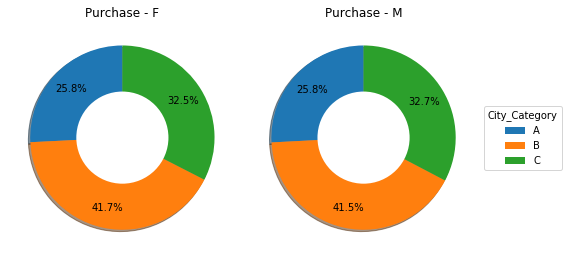

In [82]:
def multiple_pies(data, column, column2, sum_up='Purchase',figsize=(20,10)):
    """create multiple pie charts to compare aggregated value across different values within categorical variable """
    #create a figure with 1 row and the no. of columns = no. values within categorical variable
    fig, axes = plt.subplots(figsize=figsize, nrows=1, ncols=data[column].nunique())
    
    for value, ax in zip(data[column].unique(), axes.ravel()):
        column_value = [column]+[value]
        pie_plotter2(data=data, column_value = column_value, column2 =column2,  sum_up=sum_up, axes=ax,multiple=True)
        ax.set_title(sum_up + str(' - ') + value)
        #create a white circle
        centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
        #add this white circle to the axis
        ax.add_artist(centre_circle)
    plt.tight_layout()
    plt.show()
multiple_pies(data,'Gender','City_Category',figsize=(8,10))

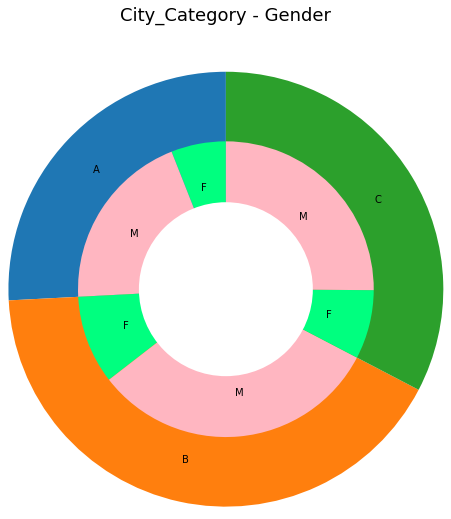

In [83]:
def pie_plotter3(data, column1, column2, sum_up='Purchase', axes=plt, title=False, multiple=False):
    "make 1 pie chart to see how a chosen categorical variable performs in each City"
    #select rows in data where column has a given value
    df = (data
          #.loc[data[column]==value]
          .groupby([column1])
          [sum_up]
          .sum()
          .reset_index()
         )

    
    labels = df[column1].get_values()
    values = df[sum_up].get_values()
    
    df2 = (data
          #.loc[data[column]==value]
          .groupby([column1,column2])
          [sum_up]
          .sum()
          .reset_index()
         )

    
    labels2 = df2[column2].get_values()
    values2= df2[sum_up].get_values()
    
    colours= ['springgreen', 'lightpink', 'darkviolet','r', 'c', 'm', 'y', 'k', 'w']
    colours_needed = colours[0:len(df2[column2].unique())]
    colours_column2 = colours_needed * int((len(labels2)/len(colours_needed)))
    #    
    
    #2 pie charts on the same axis
    axes.pie(values, radius=2.5, labels=labels,  startangle=90,labeldistance=0.8)
    axes.pie(values2, radius=1.7,labels=labels2, colors = colours_column2, startangle=90,labeldistance=0.7)
    
    #pctdistance = The ratio between the center of each pie slice and the start of the text generated by autopct
    #axes.pie(values,shadow=True,autopct='%1.1f%%',pctdistance=0.77,startangle=90)
    #plt.legend(labels=labels,title= column,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    
    if title:
        plt.title(column1 + str(' - ') + column2,pad=160, fontsize = 18)
    
    #create a white circle with a radius of 0.5
    if not multiple:  
        centre_circle = axes.Circle((0,0),1,color='black', fc='white',linewidth=0)
        #get the current figure
        fig = axes.gcf()
        #add the white circle to the current axis on the current figure
        fig.gca().add_artist(centre_circle)
pie_plotter3(data,'City_Category','Gender',title=True)

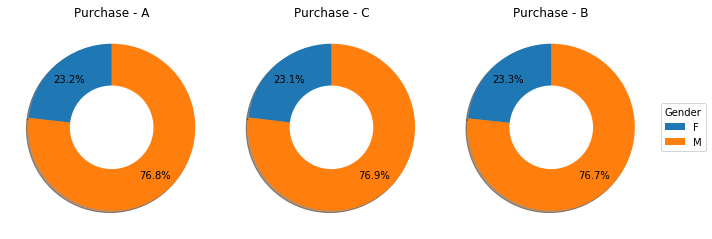

In [84]:
multiple_pies(data,'City_Category','Gender',figsize=(10,10))

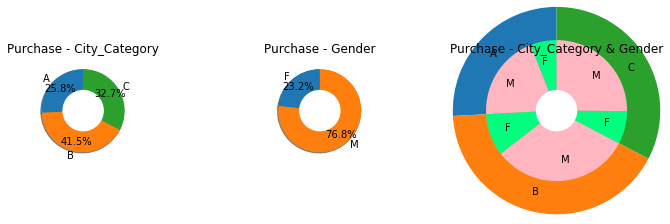

In [87]:
def multiple_pies2(data,column1,column2,sum_up='Purchase',figsize=(10,10),multiple=True):
    
    #create a figure with 1 row and the no. of columns = no. values within categorical variable
    fig, axes = plt.subplots(figsize=figsize, nrows=1, ncols=3)
    columns = [column1] + [column2]
    
    for column, ax in zip(columns, axes.ravel()[0:2]):
        pie_plotter1(data,column=column,sum_up=sum_up,axes=ax,multiple=multiple)
        #create a white circle
        centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
        #add this white circle to the axis
        ax.add_artist(centre_circle)
        ax.set_title(sum_up + ' - ' + column)
        
    final_axis = axes.ravel()[-1]
    centre_circle2 = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    pie_plotter3(data,column1=column1,column2=column2, axes=final_axis,multiple=multiple)
    final_axis.add_artist(centre_circle2)
    final_axis.set_title(f"{sum_up} - {column1} & {column2}")
    
    plt.tight_layout(pad = 3, w_pad=5, h_pad=3)
    #    

multiple_pies2(data,'City_Category','Gender',multiple=True)   